# Classification using Bayesian probability
## Naive Bayes
### Case: Classifier Penerimaan Calon Mahasiswa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, accuracy_score

### Import Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/man-juu/NaiveBayes/main/traindataset_nb.csv')
df.head(10)

,gmat,gpa,work experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gmat              40 non-null     int64  
 1   gpa               40 non-null     float64
 2   work  experience  40 non-null     int64  
 3   admitted          40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [ ]:
df.describe()

,gmat,gpa,work experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


## Dataset Split

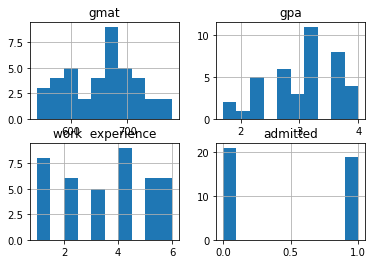

In [ ]:
df.hist()
plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

In [ ]:
#Dataset Split
X = df.drop('admitted',axis=1)
y = df[['admitted']]

In [ ]:
X.head()

,gmat,gpa,work experience
0,780,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4


In [ ]:
y.head()

,admitted
0,1
1,1
2,0
3,1
4,0


In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
print(f'Train data shape: {X_train.shape}')
print(f'Test data shape: {X_.shape}')

Train data shape: (30, 3)
Test data shape: (10, 3)


## Dataset Visualization

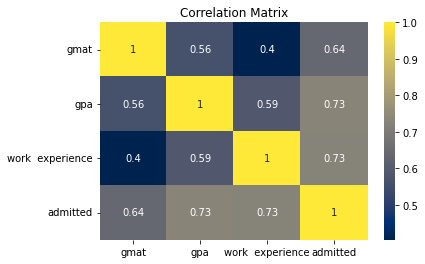

In [ ]:
#Dataset Visualization
sns.heatmap(data=df.corr(), cmap='cividis',annot=True)
plt.title("Correlation Matrix")
plt.show()

## Data Normalization

In [ ]:
#Data Normalization
norm = MinMaxScaler()
scd_X_train = pd.DataFrame(norm.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
scd_X_ = pd.DataFrame(norm.transform(X_), columns=X_.columns, index=X_.index)
scd_X_train.head()

,gmat,gpa,work experience
5,0.826087,0.869565,1.0
23,0.043478,0.434783,0.0
18,0.000000,0.434783,0.2
12,0.739130,0.869565,1.0
31,0.347826,0.434783,0.2


## Naive Bayes Model

In [ ]:
class naive_bayes:
  def __init__(self):
    pass

  def fit(self, X, y):
    self._mean = {}
    self._var = {}
    self._priors = {}

    data = pd.concat([X, y], axis=1)
    data = data.sort_values(by=['admitted'])
    self.n_classes = y['admitted'].unique()

    for col in X.columns:
      self._mean[col] = {}
      self._var[col] = {}

    split_data = {}
    for cls in self.n_classes:
      split_data[cls] = data[data['admitted'] == cls].loc[:, data.columns != 'admitted']

    for i in split_data:
      for j in split_data[i]:
        self._mean[j][i] = split_data[i][j].mean()
        self._var[j][i] = split_data[i][j].var()

    for cls in self.n_classes:
      self._priors[cls] = len(split_data[cls]) / len(data)

  def predict(self, X):
    predictions = []
    for i in range(len(X)):
      _posteriors = np.array([])
      
      for cls in self.n_classes:
        posterior = 1
        
        for col in X.columns:
          value = X.iloc[i][col]
          mean = self._mean[col][cls]
          var = self._var[col][cls]
          fx = (1 / (np.sqrt(2 * np.pi) * (np.sqrt(var)))) * np.exp(-1 * ((value - mean) ** 2 / (2 * var)))
          posterior *= fx
        _posteriors = np.append(_posteriors, posterior)

      predictions.append(self.n_classes[np.argmax(_posteriors)])
      
    return predictions

In [ ]:
model = naive_bayes()
model.fit(scd_X_train, y_train)

## Predict using training dataset

In [ ]:
y_pred = model.predict(scd_X_)
y_pred

[0, 0, 1, 0, 1, 0, 1, 1, 1, 0]

In [ ]:
y_gt = y_['admitted']
temp = pd.DataFrame({
    'y_pred': y_pred,
    'y_true': y_gt
})
pd.concat([scd_X_, temp], axis=1)

,gmat,gpa,work experience,y_pred,y_true
15,0.304348,0.565217,0.0,0,0
27,0.173913,0.260870,0.2,0,0
25,0.565217,0.695652,1.0,1,1
16,0.173913,0.434783,0.6,0,0
17,0.478261,0.869565,1.0,1,1
37,0.173913,0.695652,0.0,0,0
8,0.869565,0.695652,0.8,1,1
0,1.043478,1.000000,0.4,1,1
1,0.913043,0.956522,0.6,1,1
21,0.260870,0.130435,0.0,0,0


## Evaluate

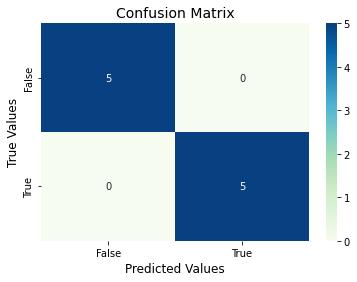

In [ ]:
conf_mtx = confusion_matrix(y_gt, y_pred)
ax = sns.heatmap(conf_mtx, xticklabels=(['False','True']), yticklabels=(['False','True']), cmap='GnBu',annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

True Negative: 5, True Positive: 5, False Negative: 0, False Positive: 0

In [ ]:
print('ACCURACY SCORE: ', accuracy_score(y_gt, y_pred), '\n')
print('PRECISION SCORE: ', precision_score(y_gt, y_pred), '\n')
print('RECALL SCORE: ', recall_score(y_gt, y_pred), '\n')
print('CLASSIFICATION REPORT:\n', classification_report(y_gt, y_pred))

ACCURACY SCORE:  1.0 

PRECISION SCORE:  1.0 

RECALL SCORE:  1.0 

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



Berdasarkan evaluasi yang telah dilakukan, model naive bayes sudah cukup baik untuk training dataset kita. Hasil klasifikasi seluruh data sudah benar. Selanjutnya kita terapkan model yang sudah dievaluasi pada test dataset.

## Predict Test Dataset

In [ ]:
X_test = pd.read_csv('https://raw.githubusercontent.com/man-juu/NaiveBayes/main/testdataset_nb.csv')
X_test.columns = X_train.columns
scd_X_test = pd.DataFrame(norm.transform(X_test), columns=X_test.columns)

print(f'Test data shape: {X_test.shape}')

Test data shape: (5, 3)


In [ ]:
y_test_pred = model.predict(scd_X_test)
y_test_pred

[0, 1, 1, 0, 1]

In [ ]:
test_pred_results = pd.concat([scd_X_test, pd.Series(y_test_pred, name='y_pred')], axis=1)
test_pred_results

,gmat,gpa,work experience,y_pred
0,0.217391,0.130435,0.4,0
1,0.869565,0.869565,0.6,1
2,0.608696,0.695652,1.0,1
3,0.304348,0.260870,0.0,0
4,0.739130,0.565217,0.8,1
